# EDA BATTEL POKEMON

## Imports

**Version of python = 3.13.2**

**Versions of package**
- *Pandas*     = 3.0.0
- *Numpy*      = 2.4.2
- *Matplotlib* = 3.10.8
- *Seaborn*    = 0.13.2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Render plots inline
%matplotlib inline

In [4]:
# 0. Insert data into dataframes
df_pokemon = pd.read_csv('../data/pokemon.csv')
df_fight = pd.read_csv('../data/combats.csv')

print("Pokémons:", df_pokemon.shape)
print("Batallas:", df_fight.shape)

Pokémons: (800, 12)
Batallas: (50000, 3)


## Dataframe de datos de pokemon
Incluye el porcentaje de victoria y la cantidad de batallas de cada pokemon al dataframe de la pokedex

In [33]:
# 1. We counted how many times each Pokémon appeared as the first and second attacker
count_first_pokemon = df_fight['First_pokemon'].value_counts()
count_second_pokemon = df_fight['Second_pokemon'].value_counts()

# 2. We add both positions together to get the total number of fights per ID.
total_figths = count_first_pokemon.add(count_second_pokemon, fill_value=0)

# 3. Count wins per ID
total_wins = df_fight['Winner'].value_counts()

# 4. Create a performance DataFrame to perform the calculation. Use the Pokémon ID as the index.
df_pk_performance = pd.DataFrame({
    'Figths': total_figths,
    'Wins': total_wins
}).fillna(0) # If a Pokémon didn't battle or didn't win, enter 0.

# 5. Calculate win rate (Wins / Entries)
df_pk_performance['Win_Rate'] = (df_pk_performance['Wins'] / df_pk_performance['Figths']) * 100

# 6. Combine the results with the original statistics DataFrame. We use `left_on='#'` because in the Pokémon CSV file, the ID is usually '#'.
df_final = df_pokemon.merge(df_pk_performance[['Win_Rate', 'Figths', 'Wins']], left_on='#', right_index=True, how='left')

# 7. Clean pokémon that didn't battle will have a NaN in Win_Rate, so we set them to 0
df_final['Win_Rate'] = df_final['Win_Rate'].fillna(0).round(2)
df_final["Figths"] = df_final["Figths"].fillna(0).astype(int)
df_final['Wins'] = df_final['Wins'].fillna(0).astype(int)
stats = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
# 8. View the top 10 Pokémon ordered by win rate
print("Top 10 Pokemon by Win Rate:")
print("-" * 30)
print(df_final[['#', 'Name'] + stats + ['Figths', 'Win_Rate', 'Wins']].sort_values(by='Win_Rate', ascending=False).head(10).to_string(index=False))

Top 10 Pokemon by Win Rate:
------------------------------
  #                     Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Figths  Win_Rate  Wins
155          Mega Aerodactyl  80     135       85       70       95    150     129     98.45   127
513                  Weavile  70     120       65       45       85    125     119     97.48   116
704   Tornadus Therian Forme  79     100       80      110       90    121     125     96.80   121
 20            Mega Beedrill  65     150       40       15       80    145     119     96.64   115
154               Aerodactyl  80     105       65       60       75    130     141     96.45   136
477             Mega Lopunny  65     136       94       54       96    135     129     96.12   124
727                 Greninja  72      95       67      103       71    122     127     96.06   122
717 Meloetta Pirouette Forme 100     128       90       77       77    128     123     95.93   118
165            Mega Mewtwo Y 106     150       70 

## Media de Estadisticas de Pokemon

In [9]:
# Valors nulls in the dataset 
null_values = df_pokemon.isnull().sum()
maskNulls = null_values > 0

# Mean values of the columns
mean_stats = df_pokemon.describe().mean().drop(labels=["#", "Generation"])

# Filter legendary pokemon
maskLegendary = df_pokemon["Legendary"] == True
legendary_pokemon = df_pokemon[maskLegendary]

# Prints information about the dataset
print("Dataset shape: " + str(df_pokemon.shape))

print("\nNull values per column: \n\n" + str(null_values[maskNulls]) +"\n")

print("Mean values per column: \n")

print(mean_stats)


print("\nLegendary Pokemon: " + str(legendary_pokemon.shape[0])) 


Dataset shape: (800, 12)

Null values per column: 

Type 2    386
dtype: int64

Mean values per column: 

HP         168.224177
Attack     167.057327
Defense    168.753250
Sp. Atk    164.911537
Sp. Def    169.966427
Speed      160.292247
dtype: float64

Legendary Pokemon: 65


### Media Stats pokemon menos ganadores
Media de stats de pokemon con 50% de win_rate y media de pokemon sin victorias

In [31]:
# Media de las estadísticas de los pokemon que ganaron menos de 50% de sus batallas

media_le50 = df_final[df_final['Win_Rate'] <= 50][stats].mean().round(2)
media_sin_ganar = df_final[df_final['Win_Rate'] == 0][stats].mean().round(2)

# recomendado: excluir quienes no pelearon
media_sin_ganar_con_peleas = df_final[(df_final['Win_Rate'] == 0) & (df_final['Figths'] > 0)][stats].mean().round(2)

print("\nMedia de las estadísticas de los pokemon que ganaron menos de 50% de sus batallas: \n"
      + str(media_le50) + "\n")
print("\nMedia de las estadísticas de los pokemon que no ganaron ninguna batalla: \n"
      + str(media_sin_ganar) + "\n")
print("\nMedia de las estadísticas de los pokemon que no ganaron ninguna batalla pero pelearon al menos una vez: \n"
      + str(media_sin_ganar_con_peleas) + "\n")


Media de las estadísticas de los pokemon que ganaron menos de 50% de sus batallas: 
HP         64.00
Attack     66.83
Defense    71.18
Sp. Atk    60.58
Sp. Def    63.97
Speed      46.27
dtype: float64


Media de las estadísticas de los pokemon que no ganaron ninguna batalla: 
HP         74.71
Attack     78.71
Defense    80.41
Sp. Atk    71.94
Sp. Def    78.94
Speed      60.65
dtype: float64


Media de las estadísticas de los pokemon que no ganaron ninguna batalla pero pelearon al menos una vez: 
HP          20.0
Attack      10.0
Defense    230.0
Sp. Atk     10.0
Sp. Def    230.0
Speed        5.0
dtype: float64



### Umbral de stats para ganar y pokemon por debajo 

In [34]:
ganadores = df_pokemon[df_pokemon['#'].isin(df_fight['Winner'])]
umbral_q25 = ganadores[stats].quantile(0.25)
print("\nUmbral del primer cuartil para cada estadística: \n")
print(umbral_q25)

# Filtrar los Pokémon que tienen todas sus estadísticas por debajo del umbral del primer cuartil
pokemon_debil = ganadores[
    (ganadores['HP'] < umbral_q25['HP']) &
    (ganadores['Attack'] < umbral_q25['Attack']) &
    (ganadores['Defense'] < umbral_q25['Defense']) &
    (ganadores['Sp. Atk'] < umbral_q25['Sp. Atk']) &
    (ganadores['Sp. Def'] < umbral_q25['Sp. Def']) &
    (ganadores['Speed'] < umbral_q25['Speed'])
]
print("\nPokémon que ganaron al menos una batalla pero tienen todas sus estadísticas por debajo del primer cuartil: \n")
print(pokemon_debil[['#', 'Name'] + stats].to_string(index=False))


Umbral del primer cuartil para cada estadística: 

HP         50.0
Attack     55.0
Defense    50.0
Sp. Atk    50.0
Sp. Def    50.0
Speed      45.0
Name: 0.25, dtype: float64

Pokémon que ganaron al menos una batalla pero tienen todas sus estadísticas por debajo del primer cuartil: 

  #       Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
176    Sentret  35      46       34       35       45     20
207    Sunkern  30      30       30       30       30     30
256    Tyrogue  35      35       35       35       35     35
289    Wurmple  45      45       35       20       30     20
304      Ralts  28      25       25       45       35     40
447  Kricketot  37      25       41       25       41     25
458      Burmy  40      29       45       29       45     36
733 Scatterbug  38      35       40       27       25     35


### Win_Rate Legendaries and stats mean

In [23]:
leg = df_final[df_final['Legendary']]
ratio_legendarios = leg['Win_Rate'].mean().round(2)
media_stats_legendarios = leg[stats].mean().round(2)

print("\nMedia de la tasa de victoria de los Pokémon legendarios: " + str(ratio_legendarios) + "%\n")
print("Media de las estadísticas de los Pokémon legendarios: \n" + str(media_stats_legendarios) + "\n")


Media de la tasa de victoria de los Pokémon legendarios: 76.72%

Media de las estadísticas de los Pokémon legendarios: 
HP          92.74
Attack     116.68
Defense     99.66
Sp. Atk    122.18
Sp. Def    105.94
Speed      100.18
dtype: float64



## DataFrame no-Megaevolutions by Win_Rate

In [28]:
top_no_mega = (
    df_final[~df_final['Name'].str.contains('Mega', case=False, na=False)]
    .query('Win_Rate > 0')
    .sort_values(['Win_Rate'], ascending=False)
    [['#', 'Name'] + stats + ['Win_Rate'] ]
)
print("\nTop Pokémon (excluyendo Mega Evolutions) por tasa de victoria: \n")
print(top_no_mega.to_string(index=False))


Top Pokémon (excluyendo Mega Evolutions) por tasa de victoria: 

  #                      Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Win_Rate
513                   Weavile  70     120       65       45       85    125     97.48
704    Tornadus Therian Forme  79     100       80      110       90    121     96.80
154                Aerodactyl  80     105       65       60       75    130     96.45
727                  Greninja  72      95       67      103       71    122     96.06
717  Meloetta Pirouette Forme 100     128       90       77       77    128     95.93
552         Shaymin Sky Forme 100     103       75      120       75    127     94.07
550                   Darkrai  70      90       90      135       90    125     94.02
234                   Sneasel  55      95       55       35       75    115     93.81
263                    Raikou  90      85       75      115      100    115     93.81
583                 Zebstrika  75     100       63       80       63    11

## Contadores de Pokemon por tipo

In [10]:
general_Types_Pokemon = df_pokemon["Type 1"].value_counts() + df_pokemon["Type 2"].value_counts()
print(general_Types_Pokemon)

Type 1
Bug          72
Dark         51
Dragon       50
Electric     50
Fairy        40
Fighting     53
Fire         64
Flying      101
Ghost        46
Grass        95
Ground       67
Ice          38
Normal      102
Poison       62
Psychic      90
Rock         58
Steel        49
Water       126
Name: count, dtype: int64


## Tasa de Victoria por tipo y tipo que más gana

In [35]:
winrate_tipo = (
    df_final.groupby('Type 1')
    .agg(avg_win_rate=('Win_Rate','mean'),
         total_wins=('Wins','sum'),
         total_fights=('Figths','sum'))
)
winrate_tipo['weighted_win_rate'] = (winrate_tipo['total_wins']/winrate_tipo['total_fights']*100).round(2)
winrate_tipo.sort_values('weighted_win_rate', ascending=False).head(10)

print("\nTop 10 tipos de Pokémon por tasa de victoria ponderada: \n")
print(winrate_tipo.sort_values('weighted_win_rate', ascending=False).head(10).to_string(index=True))


Top 10 tipos de Pokémon por tasa de victoria ponderada: 

          avg_win_rate  total_wins  total_fights  weighted_win_rate
Type 1                                                             
Flying       76.505000         362           478              75.73
Dark         60.941290        2447          3845              63.64
Dragon       61.378750        2490          3932              63.33
Electric     61.847727        3370          5346              63.04
Fire         57.920769        3802          6552              58.03
Psychic      54.574561        3998          7320              54.62
Normal       51.918163        6518         12098              53.88
Ground       52.460313        2088          3889              53.69
Ghost        46.890313        1877          3908              48.03
Water        45.678571        6569         14041              46.78


## Dataframe de pokemon en batallas
Combinación de stats en batallas

In [44]:
# DataFrame de batallas: ordenado y simple
def build_fights_with_stats(df_fight, df_pokemon, include_name=False):
    stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

    # Base de batallas
    df_battles_stats = df_fight[['First_pokemon', 'Second_pokemon', 'Winner']].copy()

    # Stats de pokemon 1
    p1 = df_pokemon[['#'] + stats_cols].rename(columns={
        '#': 'First_pokemon',
        'HP': 'HP_p1',
        'Attack': 'Attack_p1',
        'Defense': 'Defense_p1',
        'Sp. Atk': 'Sp. Atk_p1',
        'Sp. Def': 'Sp. Def_p1',
        'Speed': 'Speed_p1'
    })

    # Stats de pokemon 2
    p2 = df_pokemon[['#'] + stats_cols].rename(columns={
        '#': 'Second_pokemon',
        'HP': 'HP_p2',
        'Attack': 'Attack_p2',
        'Defense': 'Defense_p2',
        'Sp. Atk': 'Sp. Atk_p2',
        'Sp. Def': 'Sp. Def_p2',
        'Speed': 'Speed_p2'
    })

    # Merge principal
    df_battles_stats = df_battles_stats.merge(p1, on='First_pokemon', how='left')
    df_battles_stats = df_battles_stats.merge(p2, on='Second_pokemon', how='left')

    # Nombre del ganador (siempre)
    name_winner = df_pokemon[['#', 'Name']].rename(columns={'#': 'Winner', 'Name': 'Name_winner'})
    df_battles_stats = df_battles_stats.merge(name_winner, on='Winner', how='left')

    # Nombres opcionales de pokemon 1 y 2
    if include_name:
        names_p1 = df_pokemon[['#', 'Name']].rename(columns={'#': 'First_pokemon', 'Name': 'Name_p1'})
        names_p2 = df_pokemon[['#', 'Name']].rename(columns={'#': 'Second_pokemon', 'Name': 'Name_p2'})
        df_battles_stats = df_battles_stats.merge(names_p1, on='First_pokemon', how='left')
        df_battles_stats = df_battles_stats.merge(names_p2, on='Second_pokemon', how='left')

    # Orden de columnas: p1 + stats, p2 + stats, ganador(id+nombre)
    ordered_cols = [
        'First_pokemon',
        'HP_p1', 'Attack_p1', 'Defense_p1', 'Sp. Atk_p1', 'Sp. Def_p1', 'Speed_p1',
        'Second_pokemon',
        'HP_p2', 'Attack_p2', 'Defense_p2', 'Sp. Atk_p2', 'Sp. Def_p2', 'Speed_p2',
        'Winner', 'Name_winner'
    ]

    if include_name:
        ordered_cols = [
            'First_pokemon', 'Name_p1',
            'HP_p1', 'Attack_p1', 'Defense_p1', 'Sp. Atk_p1', 'Sp. Def_p1', 'Speed_p1',
            'Second_pokemon', 'Name_p2',
            'HP_p2', 'Attack_p2', 'Defense_p2', 'Sp. Atk_p2', 'Sp. Def_p2', 'Speed_p2',
            'Winner', 'Name_winner'
        ]

    return df_battles_stats[ordered_cols]

# Cambia a True si quieres incluir Name_p1 y Name_p2
include_name = True
df_battles_stats = build_fights_with_stats(df_fight=df_fight, df_pokemon=df_pokemon, include_name=include_name)

print('Shape:', df_battles_stats.shape)
df_battles_stats.head(10)

Shape: (50000, 18)


,First_pokemon,Name_p1,HP_p1,Attack_p1,Defense_p1,Sp. Atk_p1,Sp. Def_p1,Speed_p1,Second_pokemon,Name_p2,HP_p2,Attack_p2,Defense_p2,Sp. Atk_p2,Sp. Def_p2,Speed_p2,Winner,Name_winner
0,266,Larvitar,50,64,50,45,50,41,298,Nuzleaf,70,70,40,60,40,60,298,Nuzleaf
1,702,Virizion,91,90,72,90,129,108,701,Terrakion,91,129,90,72,90,108,701,Terrakion
2,191,Togetic,55,40,85,80,105,40,668,Beheeyem,75,75,75,125,95,40,668,Beheeyem
3,237,Slugma,40,40,40,70,40,20,683,Druddigon,77,120,90,60,90,48,683,Druddigon
4,151,Omastar,70,60,125,115,70,55,231,Shuckle,20,10,230,10,230,5,151,Omastar
5,657,Joltik,50,47,50,57,50,65,752,Aegislash Shield Forme,60,50,150,50,150,60,657,Joltik
6,192,Natu,40,50,45,70,45,70,134,Jynx,65,50,35,115,95,95,134,Jynx
7,73,Machop,70,80,50,35,35,35,545,Giratina Altered Forme,150,100,120,100,120,90,545,Giratina Altered Forme
8,220,Pineco,50,65,90,35,35,15,763,Clauncher,50,53,62,58,63,44,763,Clauncher
9,302,Wingull,40,30,30,55,30,85,31,Pikachu,35,55,40,50,50,90,31,Pikachu


# # stads_1 / # stads_2 / #

# Matriz de Correlación

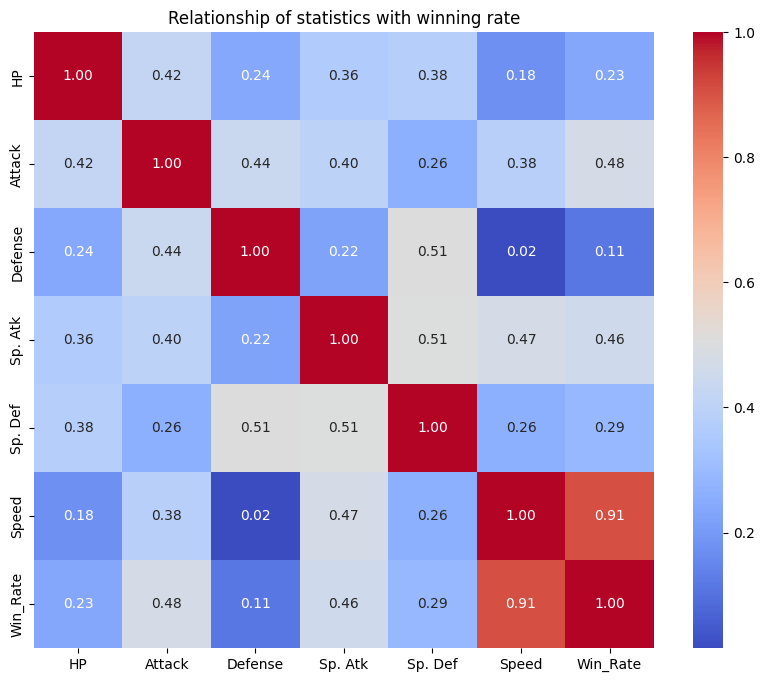

In [11]:
cols_interes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_Rate']
correlation = df_final[cols_interes].corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Relationship of statistics with winning rate')
plt.show()